<a href="https://colab.research.google.com/github/Pranav-Nirbhavane/diabetes-prediction/blob/main/end_to_end_diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**☝ Predicting if someone has diabetes using machine learning**

This notebook looks into using various Python based machine learning and data science libraries in as attempt to build a machine learning model capable of predicting whether or not someone has diabetes based on their medical attributes.

We are going to take the following approach:

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# **1. Problem Defination**

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have diabetes?

# **2. Data**

The original data came from kaggle.
https://www.kaggle.com/datasets/asinow/diabetes-dataset/data

# **3. Evaluation**
> If we can reach 95% accuracy at predicting whether or not a patient has diabetes during the proof of concept, we will pursue the project.

# **4. Feature**

This dataset contains **9,538** medical records related to diabetes diagnosis and risk factors. It includes various health parameters, lifestyle habits, and genetic predispositions that contribute to diabetes risk. The data is structured with realistic distributions, making it valuable for medical research, statistical analysis, and machine learning applications.

**Create data dictionary**
1. **Age**: The age of the individual (18-90 years).

2. **Pregnancies**: Number of times the patient has been pregnant.

3. **BMI (Body Mass Index)**: A measure of body fat based on height and weight (kg/m²).

4. **Glucose**: Blood glucose concentration (mg/dL), a key diabetes indicator.

5. **BloodPressure**: Systolic blood pressure (mmHg), higher levels may indicate hypertension.

6. **HbA1c**: Hemoglobin A1c level (%), representing average blood sugar over months.

7. **LDL (Low-Density Lipoprotein)**: "Bad" cholesterol level (mg/dL).

8. **HDL (High-Density Lipoprotein)**: "Good" cholesterol level (mg/dL).

8. **Triglycerides**: Fat levels in the blood (mg/dL), high values increase diabetes risk.

10. **WaistCircumference**: Waist measurement (cm), an indicator of central obesity.

11. **HipCircumference**: Hip measurement (cm), used to calculate WHR.

12. **WHR (Waist-to-Hip Ratio)**: Waist circumference divided by hip circumference.

13. **FamilyHistory**: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).

14. **DietType**: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).

15. **Hypertension**: Presence of high blood pressure (1 = Yes, 0 = No).

16. **MedicationUse**: Indicates if the individual is taking medication (1 = Yes, 0 = No).

17. **Outcome**: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).


# **1. Preparing the tools**

In [ ]:
# Import regular EDA (Exploratory data analysis)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# **2. Load the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_dataset.csv')
df

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


In [ ]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [ ]:
# Features present in the data
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,int64
Pregnancies,int64
BMI,float64
Glucose,float64
BloodPressure,float64
HbA1c,float64
LDL,float64
HDL,float64
Triglycerides,float64
WaistCircumference,float64


In [ ]:
# Shape of data
df.shape, df.size

((9538, 17), 162146)

In [ ]:
# Check if there are any NaN values
df.isna().sum()

,0
Age,0
Pregnancies,0
BMI,0
Glucose,0
BloodPressure,0
HbA1c,0
LDL,0
HDL,0
Triglycerides,0
WaistCircumference,0


In [ ]:
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


# **3. Exploratory Data Analysis**

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,6256
1,3282


In [ ]:
df['Hypertension'].value_counts()

,count
Hypertension,
0,9528
1,10


In [ ]:
df['MedicationUse'].value_counts()

,count
MedicationUse,
0,5675
1,3863


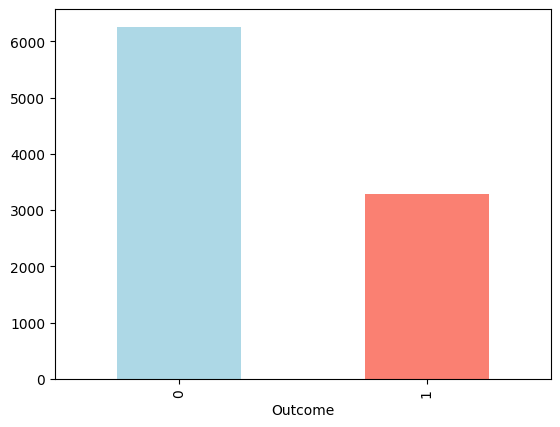

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', color=['lightblue','salmon']);

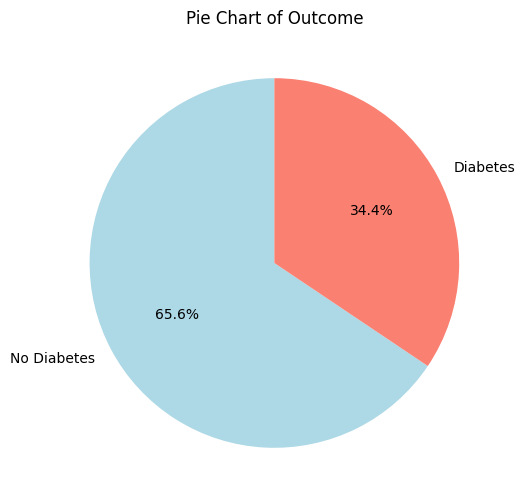

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Outcome'].value_counts(),
       labels=['No Diabetes', 'Diabetes'],
       colors=['lightblue','salmon'],
       startangle=90,
       autopct='%1.1f%%');
ax.set(title = 'Pie Chart of Outcome');

In [ ]:
df.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


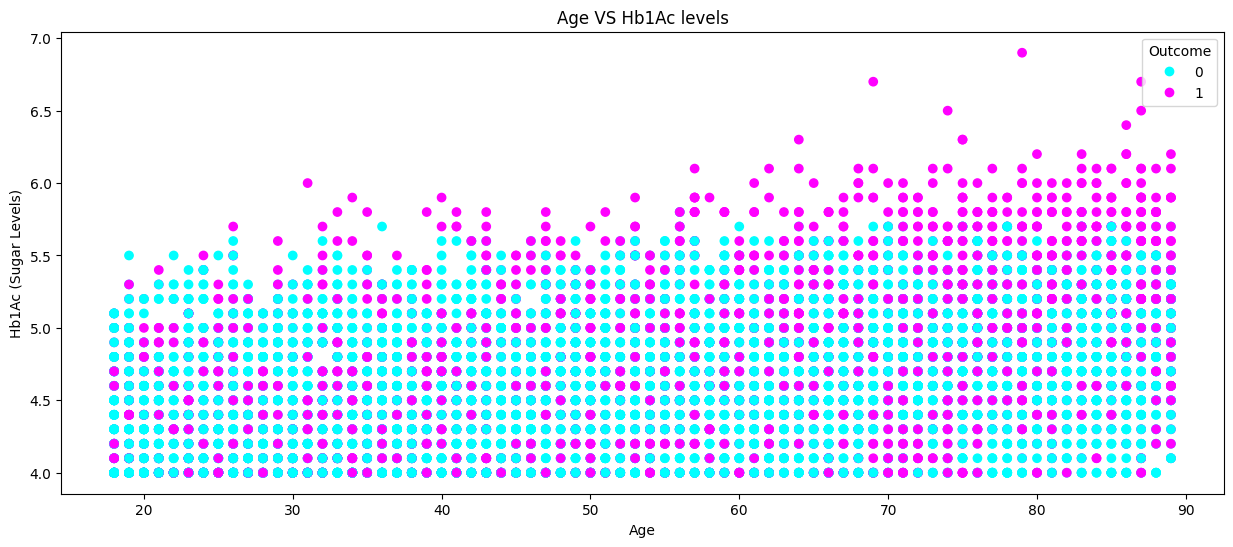

In [ ]:
# Age VS Hb1Ac levels
fig, ax = plt.subplots(figsize=(15,6))
scatter = ax.scatter(x=df['Age'],
                     y=df['HbA1c'],
                     c=df['Outcome'],
                     cmap='cool')
ax.set(xlabel='Age',
       ylabel='Hb1Ac (Sugar Levels)',
       title='Age VS Hb1Ac levels')

ax.legend(*scatter.legend_elements(), title='Outcome');

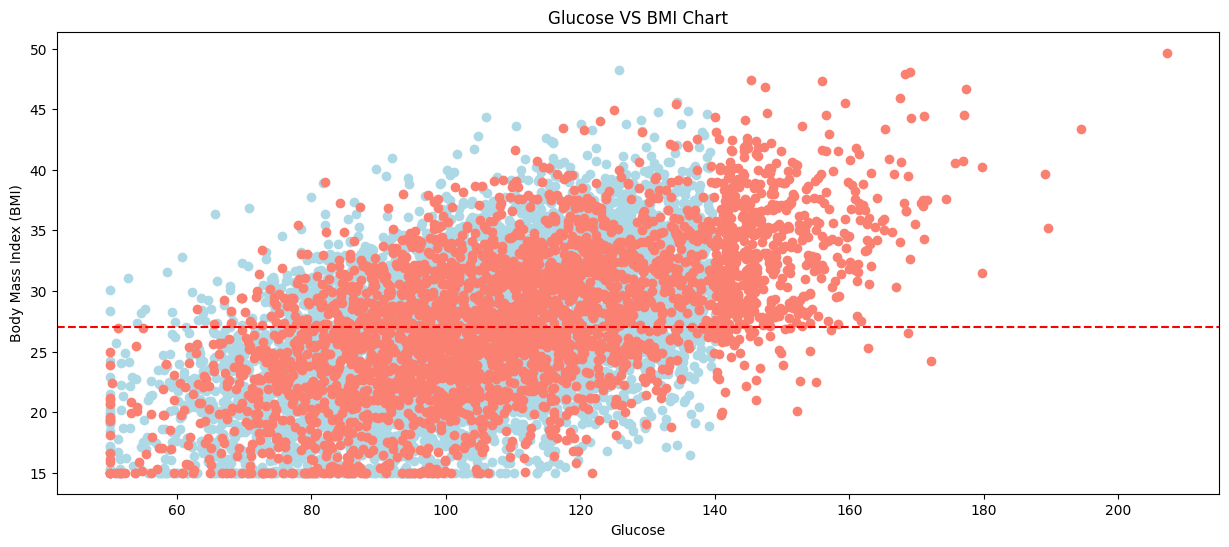

In [ ]:
# Glucose VS BMI scatter plot
fig, ax = plt.subplots(figsize=(15,6))
scatter = ax.scatter(x=df[df['Outcome'] == 0]['Glucose'],
                     y=df[df['Outcome'] == 0]['BMI'],
                     c='lightblue')

scatter = ax.scatter(x=df[df['Outcome'] == 1]['Glucose'],
                     y=df[df['Outcome'] == 1]['BMI'],
                     c='salmon')

ax.set(xlabel='Glucose',
       ylabel='Body Mass Index (BMI)',
       title= 'Glucose VS BMI Chart')

ax.axhline(df['BMI'].mean(), linestyle='--', color='red');

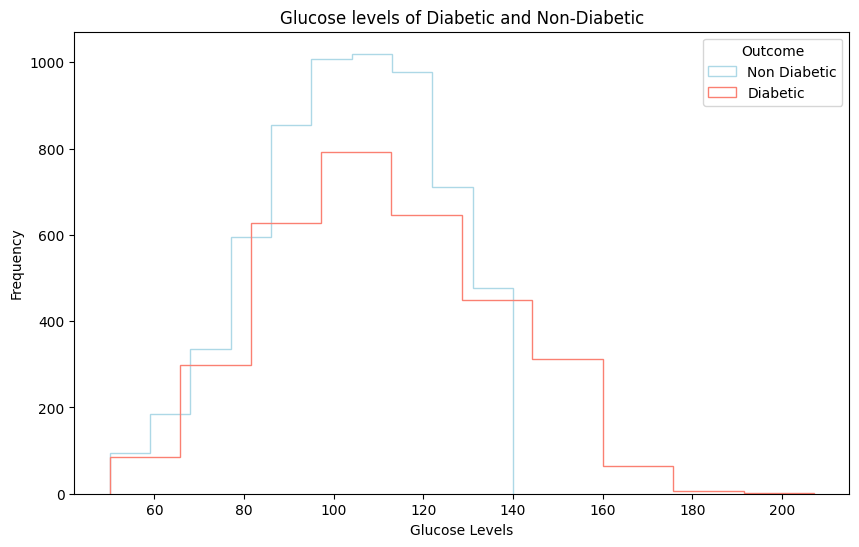

In [ ]:
# Glucose levels of Diabetic and Non-Diabetic
fig,ax = plt.subplots(figsize=(10,6))
ax.hist(df[df['Outcome'] == 0]['Glucose'],fill=False, histtype='step', color='lightblue')
ax.hist(df[df['Outcome'] == 1]['Glucose'], fill=False, histtype='step', color='salmon');
ax.legend(['Non Diabetic', 'Diabetic'], title='Outcome')
ax.set(xlabel='Glucose Levels',
       ylabel='Frequency',
       title='Glucose levels of Diabetic and Non-Diabetic');

In [ ]:
pd.crosstab(df['DietType'], df['Outcome'])

Outcome,0,1
DietType,,
0,3766,2028
1,1892,959
2,598,295


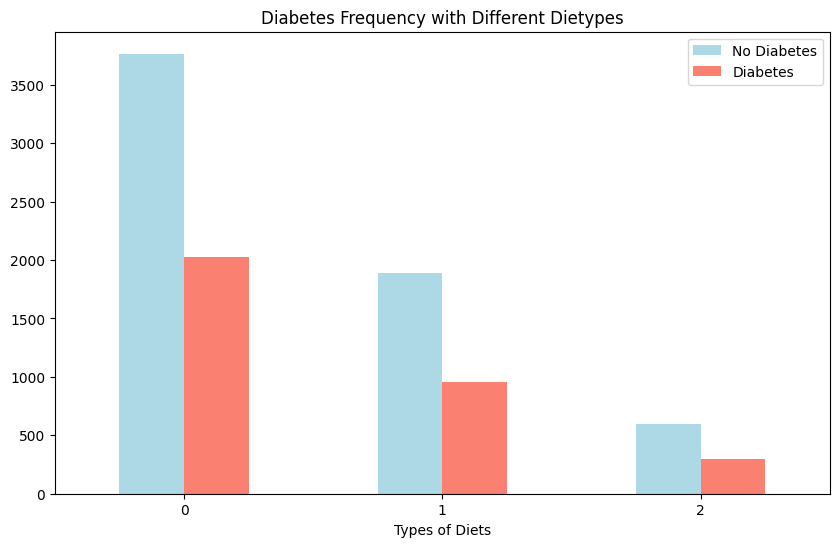

In [ ]:
# Making the crosstab more visual
pd.crosstab(df['DietType'], df['Outcome']).plot(kind='bar',
                                                figsize=(10,6),
                                                color=['lightblue', 'salmon'])
# Add some communication
plt.title(label='Diabetes Frequency with Different Dietypes')
plt.xlabel(xlabel='Types of Diets')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0);

In [ ]:
# Make a correlation matrix
df.corr()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
Age,1.000000,0.010714,0.021794,0.487808,0.429335,0.396354,-0.003871,-0.009566,0.010470,0.025591,0.020944,0.009933,-0.012887,-0.002629,0.038417,0.852709,0.068453
Pregnancies,0.010714,1.000000,-0.013993,0.007126,-0.008272,0.009060,0.006717,-0.000258,0.005732,-0.018595,-0.006866,-0.013982,-0.017077,-0.002277,-0.011730,0.001795,-0.018189
BMI,0.021794,-0.013993,1.000000,0.556683,0.605405,0.459852,0.019921,-0.018188,-0.014392,0.761734,0.662458,0.252677,0.008037,-0.017386,0.073731,0.016819,0.107248
Glucose,0.487808,0.007126,0.556683,1.000000,0.541987,0.817493,0.019576,-0.020587,-0.008765,0.428944,0.372786,0.142554,-0.005163,-0.017350,0.072806,0.415119,0.168325
BloodPressure,0.429335,-0.008272,0.605405,0.541987,1.000000,0.444980,0.000265,-0.011031,-0.014742,0.460178,0.400626,0.152305,0.001396,-0.008739,0.103512,0.369046,0.096361
HbA1c,0.396354,0.009060,0.459852,0.817493,0.444980,1.000000,0.011975,-0.023278,-0.016009,0.352626,0.308792,0.114624,-0.007981,-0.016617,0.071363,0.339440,0.151506
LDL,-0.003871,0.006717,0.019921,0.019576,0.000265,0.011975,1.000000,-0.015700,0.010864,0.017321,0.018431,0.004223,0.018212,-0.011198,-0.002842,-0.001482,0.019497
HDL,-0.009566,-0.000258,-0.018188,-0.020587,-0.011031,-0.023278,-0.015700,1.000000,-0.013875,-0.016538,-0.008864,-0.008545,-0.005171,-0.007914,-0.010167,-0.023659,-0.008837
Triglycerides,0.010470,0.005732,-0.014392,-0.008765,-0.014742,-0.016009,0.010864,-0.013875,1.000000,-0.005237,-0.002494,-0.003194,-0.004994,0.020503,0.001233,0.017658,-0.008487
WaistCircumference,0.025591,-0.018595,0.761734,0.428944,0.460178,0.352626,0.017321,-0.016538,-0.005237,1.000000,0.512328,0.644492,0.011753,-0.031460,0.036728,0.024709,0.087492


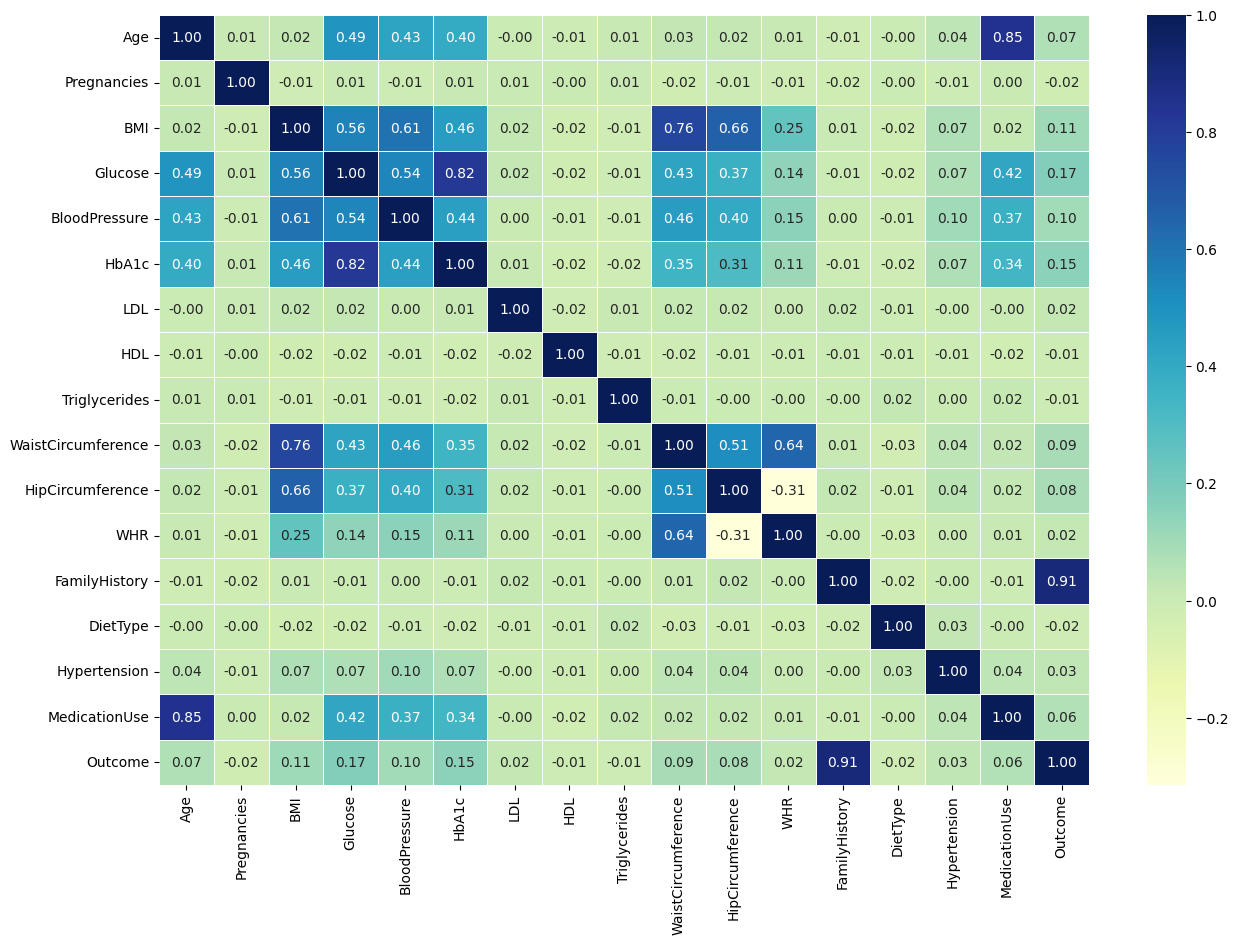

In [ ]:
# Making corelation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

# **4. Modelling**

In [ ]:
# Splitting the data into X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X.shape, y.shape

((9538, 16), (9538,))

In [ ]:
# Split data into train and test split
np.random.seed(42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7630, 16), (1908, 16), (7630,), (1908,))

We will be using **3 machine learning models**
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [ ]:
# Put the models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  # Setup random seed
  np.random.seed(42)
  # Make dictionary for model scores
  model_scores = {}
  # Loop thriugh the models
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[model_name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9722222222222222,
 'KNN Classifier': 0.6310272536687631,
 'Random Forest Classifier': 1.0}

**Model Comparison**

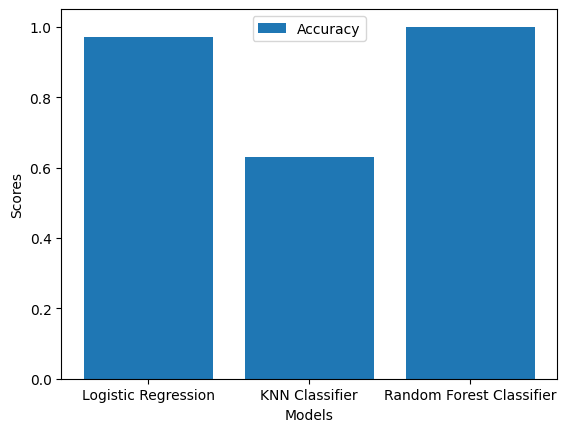

In [ ]:
fig, ax = plt.subplots()
ax.bar(model_scores.keys(),
       model_scores.values())
ax.set(xlabel='Models',
       ylabel='Scores')
ax.legend(['Accuracy'])

# **5. Hyperparameter Tuning**

**5.1 Hyperparameter tuning by hand**

In [ ]:
# Lets tune KNN
train_scores = []
test_scores = []

# Different hyperparameters
neighbors = range(1,21)
# Setup KNN instance
knn = KNeighborsClassifier()
# Loop through different values of neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)
  # Fit the algorithm
  knn.fit(X_train, y_train)
  # Score the model
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.7846657929226737,
 0.7908256880733945,
 0.7401048492791612,
 0.7448230668414154,
 0.7203145478374836,
 0.7214941022280472,
 0.7131061598951507,
 0.716251638269987,
 0.70956749672346,
 0.7110091743119266,
 0.7047182175622543,
 0.7043250327653997,
 0.7006553079947575,
 0.7056356487549148,
 0.700524246395806,
 0.7039318479685452,
 0.699475753604194,
 0.700524246395806,
 0.6972477064220184]

In [ ]:
test_scores

[0.5822851153039832,
 0.6472746331236897,
 0.6037735849056604,
 0.6588050314465409,
 0.6310272536687631,
 0.6671907756813418,
 0.6467505241090147,
 0.6781970649895178,
 0.6677148846960168,
 0.6839622641509434,
 0.6698113207547169,
 0.6886792452830188,
 0.6855345911949685,
 0.6912997903563941,
 0.6844863731656184,
 0.6933962264150944,
 0.6881551362683438,
 0.689727463312369,
 0.6876310272536688,
 0.6986373165618449]

Maximum KNN Score on the test data: 69.86%


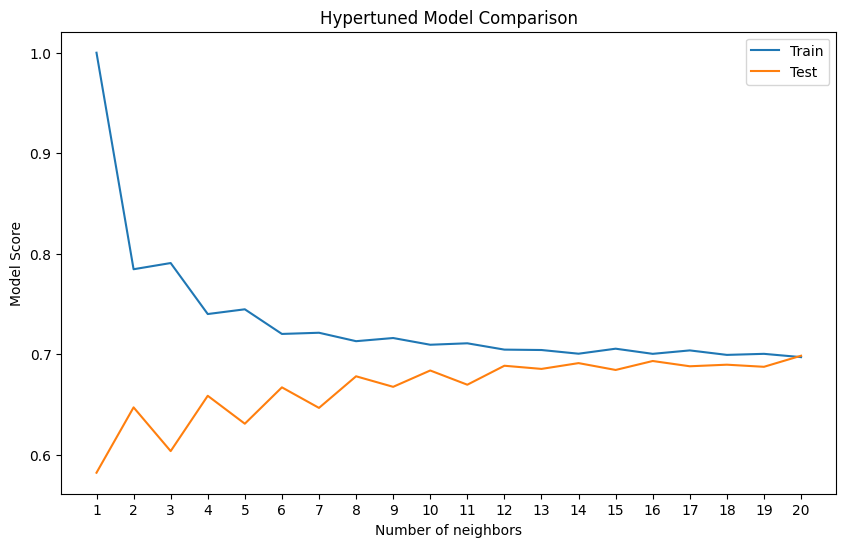

In [ ]:
# Visualizing the Hypertuned model scores
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(neighbors,
        train_scores)
ax.plot(neighbors,
        test_scores)
ax.legend(['Train', 'Test'])
ax.set_xticks(np.arange(1,21,1))
ax.set(xlabel='Number of neighbors',
       ylabel='Model Score',
       title='Hypertuned Model Comparison');

print(f'Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%')

**5.2 Hyperparameter tuning via RandomizedSearchCV**

We will be tuning the following models:
* LogisticRegression()
* RandomForestClassifier()

In [ ]:
# Creating a hyperparmater grid for Logistic Regression
lr_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create a hyperparameter grid for RandomForest Classifier
rf_grid = {
    'n_estimators': np.arange(10,1000,50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

**5.2.1 Tuned Logistic Regression**

In [ ]:
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for Logistic Regression
lr_model = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_grid,
    n_iter=20,
    n_jobs=1,
    cv=5,
    verbose=True)

# Fit random hyperparameter search model for Logistic Regression
lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
lr_model.best_params_

{'solver': 'liblinear', 'C': 3792.690190732246}

In [ ]:
lr_model.score(X_test, y_test)

0.9931865828092243

**5.2.2 Tuned Random Forest Classifier**

In [ ]:
# Setup random seed
np.random.seed(42)
# Setup hyperparameter tuned RandomForest Classifier
rf_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    n_iter=20,
    n_jobs=1,
    cv=5,
    verbose=True
)
# Fit the randomizedSearch RandomForestClassifier
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rf_model.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [ ]:
rf_model.score(X_test, y_test)

1.0

**5.3 Hyperparameter tuning with GridSearchCV**

**5.3.1 Tuned Logistic Regression Model**

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    'C':np.logspace(-4,4,30),
    'solver': ['liblinear']
}

# Setup grid hyperparameter seach for Logistic Regression
gs_log_reg = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

# Fit our Grid Hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 5298.316906283702, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.9952830188679245

# **6. Evaluating the models**

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

In [ ]:
# Make predictions with trained model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 0, ..., 0, 1, 0])

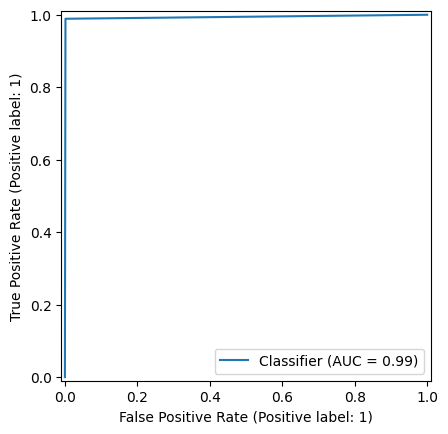

In [ ]:
# ROC curve display from predictions
RocCurveDisplay.from_predictions(y_test, y_preds);

In [ ]:
# AUC Score
roc_auc_score(y_test, y_preds)

0.993686460366137

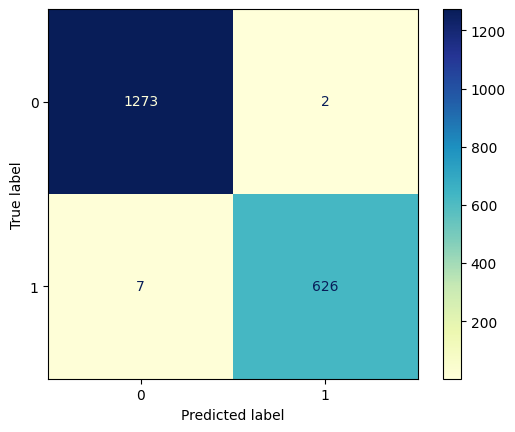

In [ ]:
# Confusion Matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1275
           1       1.00      0.99      0.99       633

    accuracy                           1.00      1908
   macro avg       1.00      0.99      0.99      1908
weighted avg       1.00      1.00      1.00      1908



In [ ]:
gs_log_reg.best_params_

{'C': 5298.316906283702, 'solver': 'liblinear'}

In [ ]:
# Creating a new classifier with best params
clf = LogisticRegression(
    C = 5298.316906283702,
    solver = 'liblinear'
)

In [ ]:
cv_acc = np.mean(cross_val_score(estimator=clf,
                                 X = X,
                                 y = y,
                                 cv = 5,
                                 scoring='accuracy'))
cv_acc

0.995281809596994

In [ ]:
cv_precision = np.mean(cross_val_score(estimator=clf,
                                       X = X,
                                       y = y,
                                       cv = 5,
                                       scoring='precision'))
cv_precision

0.9978475455649278

In [ ]:
cv_recall = np.mean(cross_val_score(estimator=clf,
                                    X = X,
                                    y = y,
                                    cv = 5,
                                    scoring='recall'))
cv_recall

0.9884215948323867

In [ ]:
cv_f1 = np.mean(cross_val_score(estimator=clf,
                                X = X,
                                y = y,
                                cv = 5,
                                scoring='f1'))
cv_f1

0.9931095299029854

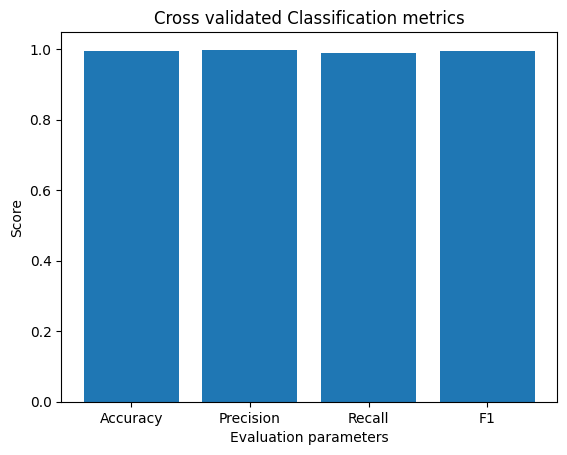

In [ ]:
cv_metrics = {'Accuracy': cv_acc,
              'Precision': cv_precision,
              'Recall': cv_recall,
              'F1': cv_f1}

fig, ax = plt.subplots()
ax.bar(cv_metrics.keys(),
       cv_metrics.values())
ax.set(xlabel='Evaluation parameters',
       ylabel='Score',
       title='Cross validated Classification metrics');

# **7. Feature Importance**

In [ ]:
gs_log_reg.best_params_

{'C': 5298.316906283702, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C=5298.316906283702,
                         solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=5298.316906283702, solver='liblinear')

In [ ]:
# Check coef_
clf.coef_

array([[-2.62966792e-03, -1.89097079e-02,  3.36683279e-02,
         4.94768252e-01,  8.85078342e-04,  3.99874600e-01,
         2.63871138e-03,  6.24632113e-03,  3.64082367e-03,
         3.18312162e-01, -2.96948133e-01, -3.42202609e+01,
         4.70188357e+01,  3.75220328e-02,  8.28846171e-01,
         1.27875998e-01]])

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': -0.0026296679164673495,
 'Pregnancies': -0.018909707857922266,
 'BMI': 0.03366832789018326,
 'Glucose': 0.4947682515636102,
 'BloodPressure': 0.0008850783416502167,
 'HbA1c': 0.39987459991912633,
 'LDL': 0.0026387113839639272,
 'HDL': 0.006246321126559743,
 'Triglycerides': 0.003640823673165157,
 'WaistCircumference': 0.31831216168034254,
 'HipCircumference': -0.29694813253654256,
 'WHR': -34.220260863292275,
 'FamilyHistory': 47.01883574903329,
 'DietType': 0.037522032777221555,
 'Hypertension': 0.8288461713185716,
 'MedicationUse': 0.12787599800646587}

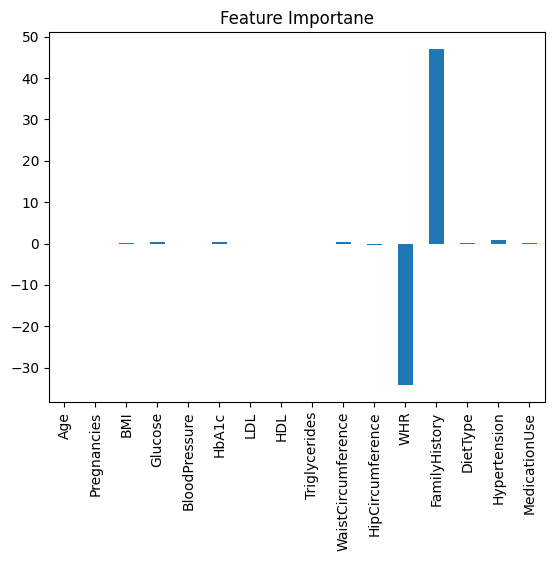

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importane', legend=False);